In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
kepler = pd.read_csv('datasets/kepler.csv')
tess = pd.read_csv('datasets/tess.csv')
k2 = pd.read_csv('datasets/k2.csv')

In [3]:
kepler_exoplanets = kepler[kepler['koi_disposition'] == 'CONFIRMED']
tess_exoplanets = tess[(tess['tfopwg_disp'] == 'CP') | (tess['tfopwg_disp'] == 'KP')]  
k2_exoplanets = k2[k2['disposition'] == 'CONFIRMED']

In [4]:
# mission열 추가
kepler_exoplanets['mission'] = 'Kepler'
tess_exoplanets['mission'] = 'TESS'
k2_exoplanets['mission'] = 'K2'

# 반지름
kepler_exoplanets['planet_radius'] = kepler_exoplanets['koi_prad']
tess_exoplanets['planet_radius'] = tess_exoplanets['pl_rade']
k2_exoplanets['planet_radius'] = k2_exoplanets['pl_rade']

# 궤도 주기
kepler_exoplanets['orbital_period'] = kepler_exoplanets['koi_period']
tess_exoplanets['orbital_period'] = tess_exoplanets['pl_orbper']
k2_exoplanets['orbital_period'] = k2_exoplanets['pl_orbper']

# 트랜싯 깊이
kepler_exoplanets['transit_depth'] = kepler_exoplanets['koi_depth']
tess_exoplanets['transit_depth'] = tess_exoplanets['pl_trandep']
k2_exoplanets['transit_depth'] = k2_exoplanets['pl_trandep']

exoplanets = pd.concat([kepler_exoplanets, tess_exoplanets, k2_exoplanets], ignore_index=True)

C:\Users\JH\AppData\Local\Temp\ipykernel_23856\2020813056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kepler_exoplanets['mission'] = 'Kepler'
C:\Users\JH\AppData\Local\Temp\ipykernel_23856\2020813056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tess_exoplanets['mission'] = 'TESS'
C:\Users\JH\AppData\Local\Temp\ipykernel_23856\2020813056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [10]:
exoplanets.to_csv('output/exoplanets.csv', index=False)

In [12]:
import pandas as pd
exoplanets = pd.read_csv("output/exoplanets.csv")
exoplanets.head()

C:\Users\JH\AppData\Local\Temp\ipykernel_23856\678315447.py:2: DtypeWarning: Columns (2,3,4,5,6,7,13,14,48,67,72,79,80,82,85,86,105,150,151,154,227,228,229,230,231,232,233,234,235,236,237,238,240,241,246,248,249,250,251,252,253,264,266,307,320,362,363,372,397,471,472,474) have mixed types. Specify dtype option on import or set low_memory=False.
  exoplanets = pd.read_csv("output/exoplanets.csv")


,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,...,releasedate,pl_nnotes,k2_campaigns,k2_campaigns_num,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,1,10797460.0,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,10797460.0,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,10854555.0,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,10872983.0,K00756.01,Kepler-228 d,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,10872983.0,K00756.02,Kepler-228 c,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


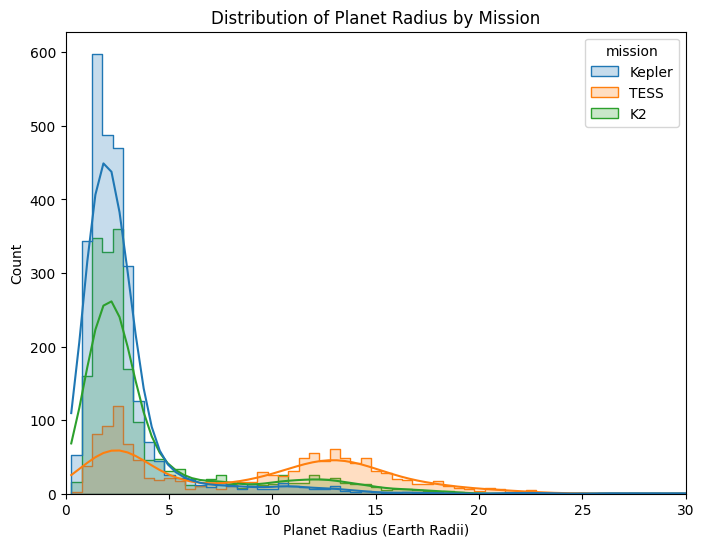

In [5]:
# 행성 반지름 분포 ( 히스토그램 )
plt.figure(figsize=(8,6))
sns.histplot(data=exoplanets, x="planet_radius", hue="mission", kde=True, element="step")
plt.xlabel("Planet Radius (Earth Radii)")
plt.ylabel("Count")
plt.title("Distribution of Planet Radius by Mission")
plt.xlim(0, 30)
plt.show()

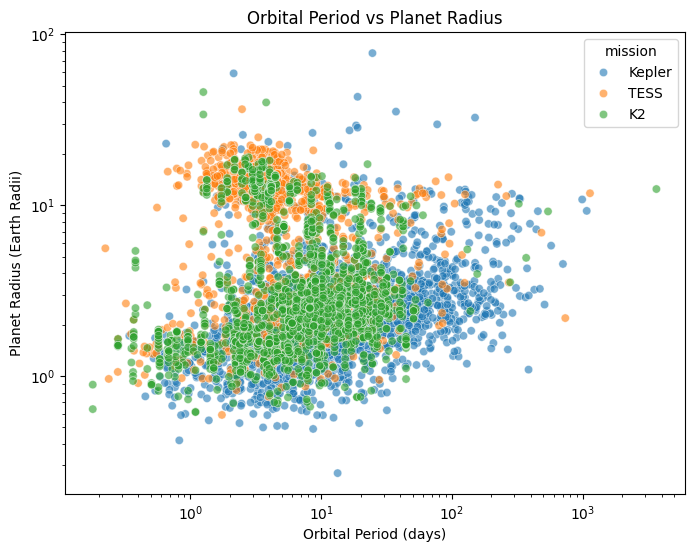

In [6]:
# 궤도 주기 vs 행성 반지름 ( 산점도 )
plt.figure(figsize=(8,6))
sns.scatterplot(data=exoplanets, x="orbital_period", y="planet_radius", hue="mission", alpha=0.6)
plt.xscale("log")  # 긴 주기를 보기 쉽게 로그 변환
plt.yscale("log")
plt.xlabel("Orbital Period (days)")
plt.ylabel("Planet Radius (Earth Radii)")
plt.title("Orbital Period vs Planet Radius")
plt.show()

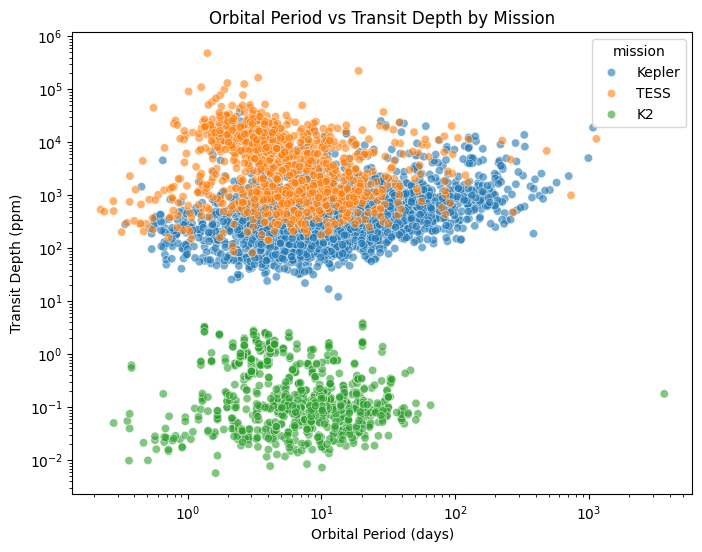

In [7]:
# 궤도 주기 vs 트랜싯 깊이 ( 로그 스케일로 보기 좋음 )
plt.figure(figsize=(8,6))
sns.scatterplot(data=exoplanets, x="orbital_period", y="transit_depth", hue="mission", alpha=0.6)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Orbital Period (days)")
plt.ylabel("Transit Depth (ppm)")
plt.title("Orbital Period vs Transit Depth by Mission")
plt.show()

In [8]:
# 트랜싯 지속시간 분포
plt.figure(figsize=(8,6))
sns.histplot(data=exoplanets, x="transit_duration", hue="mission", kde=True, element="step")
plt.xlabel("Transit Duration (hours)")
plt.title("Transit Duration Distribution by Mission")
plt.show()

ValueError: Could not interpret value `transit_duration` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

In [ ]:
# 신호 대 잡음비 (SNR) 분포
plt.figure(figsize=(8,6))
sns.boxplot(data=exoplanets, x="mission", y="snr")
plt.ylabel("Transit Signal-to-Noise")
plt.title("SNR Distribution by Mission")
plt.ylim(0, 100)  # 극단치 잘라내기
plt.show()

In [ ]:
# 상관관계 히트맵
numeric_cols = ["planet_radius", "orbital_period", "transit_depth", "transit_duration", "snr"]
plt.figure(figsize=(8,6))
sns.heatmap(exoplanets[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Transit Features")
plt.show()